# Introduction to Julia

# どんな言語？

主に科学技術計算向けのスクリプトライクな言語。手軽に数値計算できて速い。去年version 1.0がリリースされて後方互換性が保証されて研究本番にも使えるようになった感じ。
JuliaのWeb https://julialang.org

Juliaを作った背景 https://julialang.org/blog/2012/02/why-we-created-julia
We are greedy: we want more.
We want a language that’s open source, with a liberal license. We want the speed of C with the dynamism of Ruby. We want a language that’s homoiconic, with true macros like Lisp, but with obvious, familiar mathematical notation like Matlab. We want something as usable for general programming as Python, as easy for statistics as R, as natural for string processing as Perl, as powerful for linear algebra as Matlab, as good at gluing programs together as the shell. Something that is dirt simple to learn, yet keeps the most serious hackers happy. We want it interactive and we want it compiled.

Juliaのベンチマーク
https://julialang.org/benchmarks/

# なぜJulia?

Pythonの常微分方程式のソルバーパッケージとしてScipy(odeint)があるが、
計算速度が速くないのと、delay differential equationに対応していない等の問題がある。
Juliaは速度が早いのと、ソルバーパッケージが(DifferentialEquations.jl)が
delay differential equationや確率微分方程式、並列化に対応している。
また、少し調べたところパラメータfeedbackも実装できそうな感じがした。


# 以下、常微分方程式を数値的に扱うことに絞ってJuliaの機能を紹介

# 型 (type)

In [8]:
@time 1.0 + 3.0

  0.000002 seconds (5 allocations: 176 bytes)


4.0

In [14]:
typeof(1)

Int64

In [15]:
typeof(1.0)

Float64

In [18]:
typeof("hello world")

String

In [23]:
typeof([1 2 3])

Array{Int64,2}

In [25]:
typeof(1 + 1.0)#type promotion, conversino

Float64

In [33]:
1//2 + 1//3

5//6

In [35]:
loat64)+ 1.0

MethodError: MethodError: First argument to `convert` must be a Type, got 1.0

# 変数 (variable)

In [13]:
a = 1.0
b = 2.0

2.0

In [14]:
typeof(a)

Float64

In [15]:
typeof(b)

Float64

In [37]:
j

UndefVarError: UndefVarError: i not defined

# ベクトル (vector)

In [41]:
a = [1, 2, 3, 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [96]:
size(a)

(4,)

In [97]:
a[1]

1

In [98]:
a[2]

2

In [39]:
b = [1 2 3 4]

1×4 Array{Int64,2}:
 1  2  3  4

In [100]:
c = [5, 6, 7, 8]

4-element Array{Int64,1}:
 5
 6
 7
 8

In [101]:
a + b

DimensionMismatch: DimensionMismatch("dimensions must match")

In [102]:
a + c

4-element Array{Int64,1}:
  6
  8
 10
 12

In [44]:
a

4-element Array{Int64,1}:
 1
 2
 3
 4

In [45]:
b

1×4 Array{Int64,2}:
 1  2  3  4

In [46]:
a*b

4×4 Array{Int64,2}:
 1  2   3   4
 2  4   6   8
 3  6   9  12
 4  8  12  16

In [104]:
a .* c

4-element Array{Int64,1}:
  5
 12
 21
 32

# 行列 (matrix)

In [1]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [50]:
size(A)

(2, 2)

In [51]:
A[1, 1]

1

In [52]:
A[1:2, 2]

2-element Array{Int64,1}:
 2
 4

In [53]:
B = [5 6; 7 8]

2×2 Array{Int64,2}:
 5  6
 7  8

In [54]:
A + B

2×2 Array{Int64,2}:
  6   8
 10  12

In [55]:
A * B

2×2 Array{Int64,2}:
 19  22
 43  50

In [56]:
A .* B

2×2 Array{Int64,2}:
  5  12
 21  32

# ベクトルや行列の初期化 (initialization)

In [59]:
a = zeros(10)

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [61]:
a = zeros(Int64, 10)

10-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [67]:
A = zeros(3, 3)

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [68]:
A = zeros(Int64, 3, 3)

3×3 Array{Int64,2}:
 0  0  0
 0  0  0
 0  0  0

In [63]:
a = rand(10)

10-element Array{Float64,1}:
 0.6380843648544328 
 0.4735003073697399 
 0.5035391923464225 
 0.7745366680268237 
 0.10692248574285901
 0.2952933959725874 
 0.7278582554663655 
 0.2396101104700028 
 0.9033254381404723 
 0.6580287313640789 

In [67]:
a = 1:10

1:10

In [85]:
typeof(a)

UnitRange{Int64}

In [86]:
collect(a)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [73]:
t = range(1, stop=2*pi, length=5) #pi is a predefined constant

1.0:1.3207963267948966:6.283185307179586

In [74]:
collect(t)

5-element Array{Float64,1}:
 1.0               
 2.3207963267948966
 3.641592653589793 
 4.96238898038469  
 6.283185307179586 

In [75]:
[x + 1 for x in 1:3] #list comprehension

3-element Array{Int64,1}:
 2
 3
 4

In [76]:
[x for x in 1:10 if x % 2 == 0]

5-element Array{Int64,1}:
  2
  4
  6
  8
 10

In [78]:
A = reshape(1:10, 5, 2)

5×2 reshape(::UnitRange{Int64}, 5, 2) with eltype Int64:
 1   6
 2   7
 3   8
 4   9
 5  10

In [79]:
collect(A)

5×2 Array{Int64,2}:
 1   6
 2   7
 3   8
 4   9
 5  10

# ループ (loop)

In [80]:
a = 1:10

1:10

In [81]:
for i in a
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [82]:
d = 0.0
for i in 1:10
    d += 1.0
end
d

10.0

# 条件 (condition)

In [83]:
1.0 > 0.0

true

In [124]:
typeof(true)

Bool

In [121]:
1.0 < 0.0

false

In [123]:
if true
    println("hello world")
end

hello world


In [126]:
if 1.0 > 0.0
    println("hello world")
end

hello world


# 算術演算 (arithmetics)

In [84]:
A = reshape(collect(1:10), 5, 2)

5×2 Array{Int64,2}:
 1   6
 2   7
 3   8
 4   9
 5  10

In [144]:
sum(A)

55

In [145]:
sum(A, dims=1)

1×2 Array{Int64,2}:
 15  40

In [146]:
sum(A, dims=2)

5×1 Array{Int64,2}:
  7
  9
 11
 13
 15

In [85]:
sin(A)

DimensionMismatch: DimensionMismatch("matrix is not square: dimensions are (5, 2)")

In [86]:
sin.(A)

5×2 Array{Float64,2}:
  0.841471  -0.279415
  0.909297   0.656987
  0.14112    0.989358
 -0.756802   0.412118
 -0.958924  -0.544021

In [149]:
a = [1, 2, 3]
b = [4, 5, 6]
sum(a.* b)

32

In [87]:
a.^2

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [89]:
sqrt(sum(a.^2))

19.621416870348583

In [154]:
A = [1 2; 3 4]
val, vec = eigen(A)

UndefVarError: UndefVarError: eigen not defined

# 関数 (function)

In [105]:
function mysum(x)
    x + 1
end

mysum (generic function with 3 methods)

In [114]:
function mysum(y::Array{Int64, 1})
    y .+ 1
end

mysum (generic function with 5 methods)

In [106]:
mysum(1.0)

2.0

In [107]:
mysum(1)

2

In [115]:
mysum([1, 2, 3])

3-element Array{Int64,1}:
 2
 3
 4

In [116]:
mysum.([1, 2, 3])

3-element Array{Int64,1}:
 2
 3
 4

In [182]:
mysum2(x) = x + 1

mysum2 (generic function with 1 method)

In [183]:
mysum2(1.0)

2.0

In [117]:
map(x -> x + 1, [1, 2, 3])

3-element Array{Int64,1}:
 2
 3
 4

In [186]:
[x + 1 for x in [1, 2, 3]]

3-element Array{Int64,1}:
 2
 3
 4

# 描画 (Plots)

詳しくはPlotsのチュートリアル参照のこと
http://docs.juliaplots.org/latest/tutorial/#tutorial-1

In [120]:
using Plots

In [121]:
gr()

Plots.GRBackend()

In [123]:
x = range(1, stop=4*pi, length=50);
y = sin.(x);

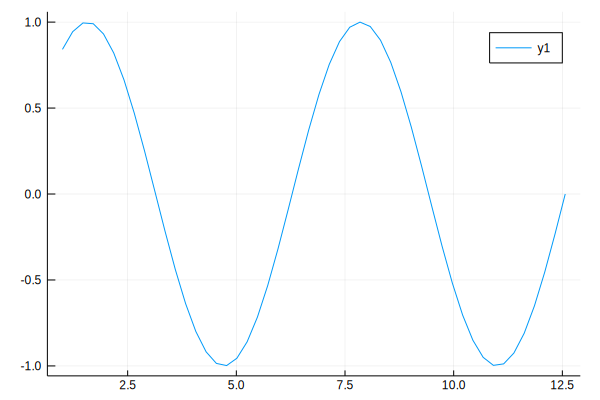

In [124]:
plot(x, y)

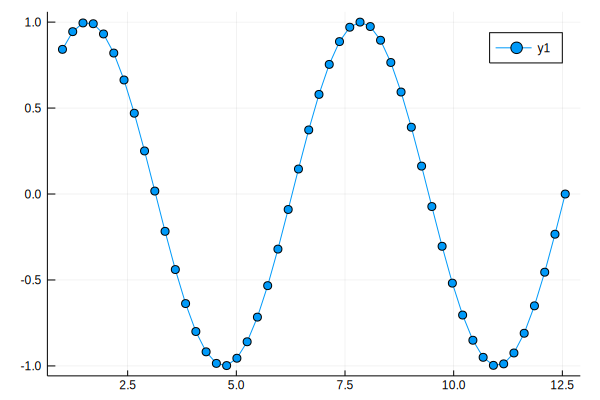

In [126]:
plot(x, y, marker=:circle)

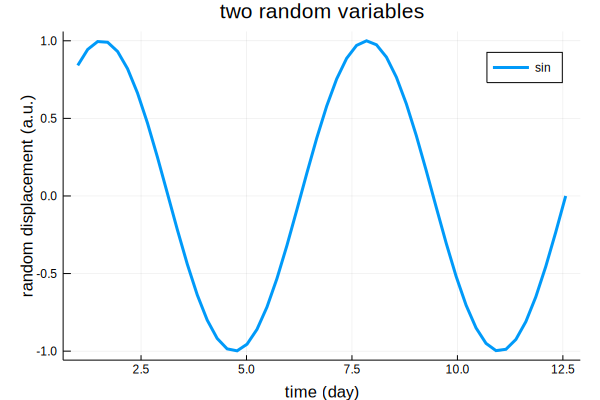

In [127]:
p = plot(x, y, title="two random variables", label=["sin"], lw=3)
xlabel!("time (day)")
ylabel!("random displacement (a.u.)")

In [128]:
savefig(p, "myplot.png")